<a href="https://colab.research.google.com/github/GarreKrishnavamsi/python.-programs/blob/main/EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
 
EDA focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

As from beginning, we are going to work on Exploratory data analysis with a Melbourne houseprice dataset. Before heading to the work, we have to know what we actually have to do
 
EDA has two primary works:
 
1.Exploring and deal with pactical questions about data helps us to understand the data

--It includes what is the size of dataset?

--What type of the data is present in dataset?

--Is it preprocessed?

--Are the correct labels present in the data?


2.Statistical questions.

--What are the values of central tendency?

--What is the quartile division of the dataset?

--What is the total count of individual data elements?

Before get started, we will import the necessary tools(libraries) to work with.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
Data=pd.read_csv("/content/melb_data.csv")
#Reading CSV file

In [ ]:
Data.head() #Showing top 5 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
Data.tail() #Showing last 5 rows.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6804,Brunswick East,106/360 Lygon St,2,u,480000.0,PI,Jellis,28/05/2016,4.5,3057.0,2.0,2.0,1.0,0.0,NaN,NaN,Moreland,-37.7679,144.9725,Northern Metropolitan,5533.0
6805,Brunswick East,18/408 Lygon St,2,u,400000.0,SP,Jellis,28/05/2016,4.5,3057.0,2.0,1.0,1.0,0.0,NaN,NaN,Moreland,-37.7650,144.9731,Northern Metropolitan,5533.0
6806,Brunswick East,28/29 Nunan St,3,u,570000.0,S,hockingstuart,28/05/2016,4.5,3057.0,2.0,1.0,1.0,0.0,NaN,NaN,Moreland,-37.7603,144.9795,Northern Metropolitan,5533.0
6807,Brunswick East,3/14 Oconnor St,2,t,771000.0,SP,Nelson,28/05/2016,4.5,3057.0,2.0,2.0,2.0,0.0,NaN,NaN,Moreland,-37.7736,144.9725,Northern Metropolitan,5533.0
6808,Brunswick East,22 Lord St,3,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data.dtypes.value_counts() #Gives a series of how many different datatypes.

float64    12
object      8
int64       1
dtype: int64

In [ ]:
list(Data.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [ ]:
Data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6809.000000,6.808000e+03,6808.00000,6808.000000,6808.000000,6808.000000,6808.000000,6808.000000,3817.000000,4364.000000,6808.000000,6808.000000,6808.000000
mean,2.841680,1.091370e+06,8.47215,3095.975323,2.800676,1.509401,1.524236,456.953290,145.449830,1961.177589,-37.809056,144.987059,7815.095182
std,0.957325,6.581367e+05,3.57933,59.537244,0.944510,0.699367,0.921640,1336.263109,158.486262,37.734592,0.060938,0.074027,4395.729809
min,1.000000,8.500000e+04,1.20000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-37.946200,144.788900,394.000000
25%,2.000000,6.500000e+05,5.60000,3044.000000,2.000000,1.000000,1.000000,130.000000,88.000000,1930.000000,-37.852200,144.933075,4675.000000
50%,3.000000,9.100000e+05,8.70000,3081.000000,3.000000,1.000000,1.000000,336.000000,122.000000,1965.000000,-37.802100,144.995800,6821.000000
75%,3.000000,1.350000e+06,11.20000,3145.000000,3.000000,2.000000,2.000000,616.000000,170.000000,1998.000000,-37.762375,145.042300,10412.000000
max,8.000000,6.500000e+06,15.00000,3207.000000,9.000000,8.000000,8.000000,75100.000000,6791.000000,2018.000000,-37.691700,145.143800,21650.000000


In thi dataset,we have to build the model that estimates the house price based on the existence price values corresponding to different variables. But we will try to figure out all odds and evens and also visualise the building features that essence the growth of price rate with EDA.

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6809 non-null   object 
 1   Address        6809 non-null   object 
 2   Rooms          6809 non-null   int64  
 3   Type           6809 non-null   object 
 4   Price          6808 non-null   float64
 5   Method         6808 non-null   object 
 6   SellerG        6808 non-null   object 
 7   Date           6808 non-null   object 
 8   Distance       6808 non-null   float64
 9   Postcode       6808 non-null   float64
 10  Bedroom2       6808 non-null   float64
 11  Bathroom       6808 non-null   float64
 12  Car            6808 non-null   float64
 13  Landsize       6808 non-null   float64
 14  BuildingArea   3817 non-null   float64
 15  YearBuilt      4364 non-null   float64
 16  CouncilArea    6808 non-null   object 
 17  Lattitude      6808 non-null   float64
 18  Longtitu

In [ ]:
Data.shape

(6809, 21)

So we have 135580 records and 21 references (variables or columns). As we can see from the top 5 records there are null values Building Area, Therefore our dataset contains some null values in it.

In [ ]:
Missing=Data.isnull().sum()

In [ ]:
Missing

Suburb              0
Address             0
Rooms               0
Type                0
Price               1
Method              1
SellerG             1
Date                1
Distance            1
Postcode            1
Bedroom2            1
Bathroom            1
Car                 1
Landsize            1
BuildingArea     2992
YearBuilt        2445
CouncilArea         1
Lattitude           1
Longtitude          1
Regionname          1
Propertycount       1
dtype: int64

Lets try to find out how many percentage of NaN values are there in our dataset.

In [ ]:
Missing_sum=Missing.sum()
Total_elements=np.product(Data.shape)
print("Percentage of missing values is",(Missing_sum/Total_elements)*100)

Percentage of missing values is 3.8128807111036513


 
Well,this not sounds an ominous to deal like with a gaint of missing values.
 
Ok, we have some missing values to deal with. Lets me give a pause. Before trying to deal to remove or impute values, Is it really necessary to do manipulate values. To understand this, we have to analyse whether these factors are really effects the price value or not.
 
Ofcourse we have to make sure there has no missing values when we are trying to built a machine learning model. So here we apply some visualisations.

In [ ]:
Data.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Whittlesea          1
Bacchus Marsh       1
Croydon South       1
Healesville         1
Upwey               1
Name: Suburb, Length: 314, dtype: int64

From the above code we can say that the suburb=Reservoir have more number of residentials. We can also view that is most popular region.

In [ ]:
Data.groupby("Regionname").Price.max()

Regionname
Eastern Metropolitan          4000000.0
Northern Metropolitan         4300000.0
South-Eastern Metropolitan    1900000.0
Southern Metropolitan         6500000.0
Western Metropolitan          3900000.0
Name: Price, dtype: float64

Therefore southern metropolitan has a residential with high pricevalue.

Lets see the min,max, avg price values based on number of rooms

In [ ]:
Data.groupby("Rooms").Price.agg([max,min])

,max,min
Rooms,,
1,2450000.0,85000.0
2,4800000.0,230000.0
3,6250000.0,301000.0
4,5700000.0,131000.0
5,5046000.0,585000.0
6,6500000.0,725000.0
7,2600000.0,1005000.0
8,2950000.0,770000.0


 Boxplot-

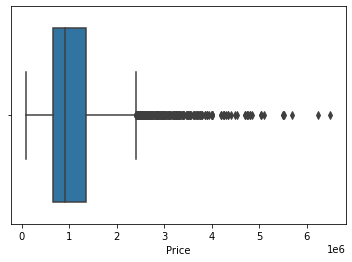

In [ ]:
sns.boxplot(x="Price",data=Data)

From the quartile range as we can see we have the median in around 1M. And we have some outliers from 3M in the plot

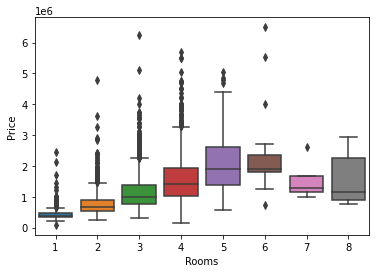

In [ ]:
sns.boxplot(x="Rooms",y="Price",data=Data)#

Here we plotted the price vs number of rooms. We see the price for 5 rooms is relatively more than 8 rooms. Because the price may also depends on the location or other factor

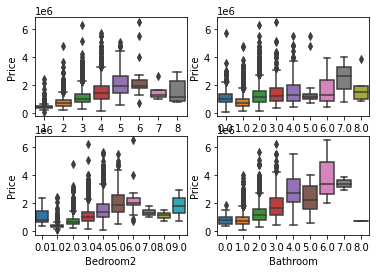

In [ ]:
fig,sub=plt.subplots(2,2)
sns.boxplot(x="Rooms",y="Price",data=Data,ax=sub[0,0])
sns.boxplot(x="Bedroom2",y="Price",data=Data,ax=sub[1,0])
sns.boxplot(x="Car",y="Price",data=Data,ax=sub[0,1])
sns.boxplot(x="Bathroom",y="Price",data=Data,ax=sub[1,1])
plt.show()

These are the box plots with independent variables of rooms,car,bedroom2,Bathroom.

Independent variables are the variables that are dimensioned at x-axis in each plot.

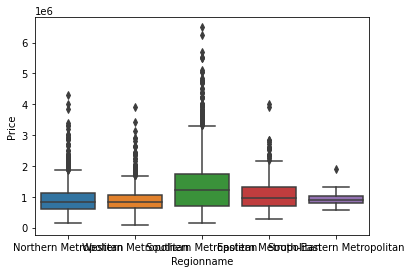

In [ ]:
sns.boxplot(x="Regionname",y="Price",data=Data)

From the plot, Southern metropolitan residentials has high value in Price.

Line plot-

In [ ]:
Line_graph=Data.loc[:,["Rooms","Bedroom2","Bathroom","Car"]]
Line_graph

,Rooms,Bedroom2,Bathroom,Car
0,2,2.0,1.0,1.0
1,2,2.0,1.0,0.0
2,3,3.0,2.0,0.0
3,3,3.0,2.0,1.0
4,4,3.0,1.0,2.0
...,...,...,...,...
6804,2,2.0,2.0,1.0
6805,2,2.0,1.0,1.0
6806,3,2.0,1.0,1.0
6807,2,2.0,2.0,2.0


(0.0, 6.0)

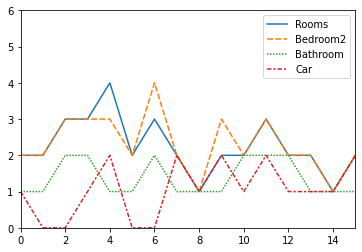

In [ ]:
sns.lineplot(data=Line_graph)
plt.xlim(0,15)
plt.ylim(0,6)

Here we try to analyse the number of different varaibles that mostly effects the house price.

Bar plot-

In [ ]:
Data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<Figure size 14400x360 with 0 Axes>

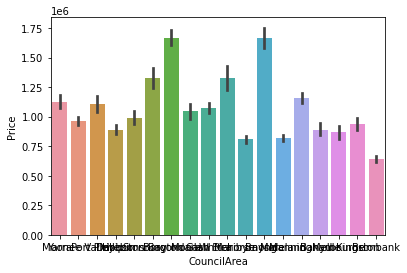

<Figure size 14400x360 with 0 Axes>

In [ ]:
sns.barplot(x="CouncilArea",y="Price",data=Data)
plt.figure(figsize=(200,5))

<Figure size 14400x360 with 0 Axes>

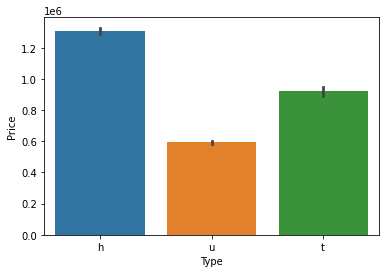

<Figure size 14400x360 with 0 Axes>

In [ ]:
sns.barplot(x="Type",y="Price",data=Data)
plt.figure(figsize=(200,5))

<Figure size 1440x360 with 0 Axes>

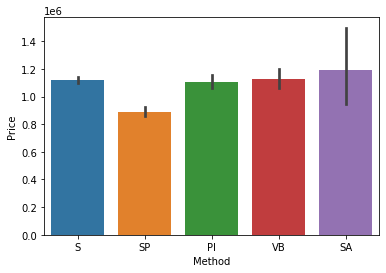

<Figure size 1440x360 with 0 Axes>

In [ ]:
sns.barplot(x="Method",y="Price",data=Data)
plt.figure(figsize=(20,5))

Method:
 
S - property sold;
 
SP - property sold prior;
 
PI - property passed in;
 
PN - sold prior not disclosed;
 
SN - sold not disclosed;
 
NB - no bid;
 
VB - vendor bid;
 
W - withdrawn prior to auction;
 
SA - sold after auction;
 
SS - sold after auction price not disclosed.
 
N/A - price or highest bid not available.

<Figure size 14400x360 with 0 Axes>

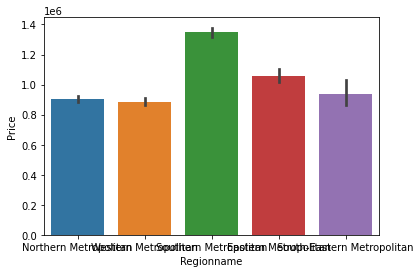

<Figure size 14400x360 with 0 Axes>

In [ ]:
 sns.barplot(x="Regionname",y="Price",data=Data)
plt.figure(figsize=(200,5))

Hearmap-

In [ ]:
Data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Scatter plot-

In [ ]:
data=Data

In [ ]:
Data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

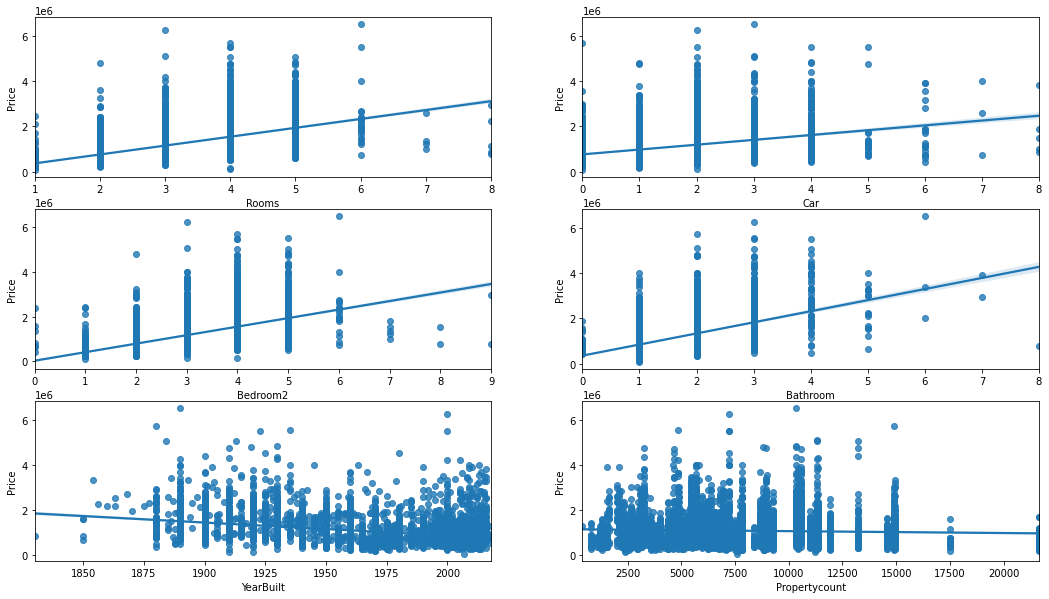

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,10))
 
sns.regplot(x='Rooms', y='Price', data=data, scatter=True, fit_reg= True, ax=ax1)
 
sns.regplot(x='Car', y='Price', data=data, scatter=True, fit_reg= True, ax=ax2)
 
sns.regplot(x='Bedroom2', y='Price', data=data, scatter=True, fit_reg= True, ax=ax3)
 
sns.regplot(x='Bathroom', y='Price', data=data, scatter=True, fit_reg= True, ax=ax4)
 
sns.regplot(x='YearBuilt', y='Price', data=data, scatter=True, fit_reg= True, ax=ax5)
 
sns.regplot(x='Propertycount', y='Price', data=data, scatter=True, fit_reg= True, ax=ax6)

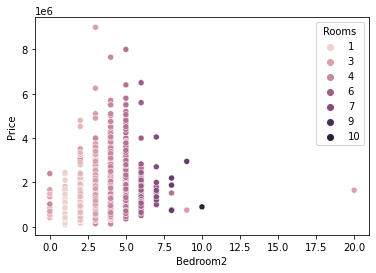

In [ ]:
sns.scatterplot(x=Data["Bedroom2"],y=Data["Price"],hue=Data["Rooms"])

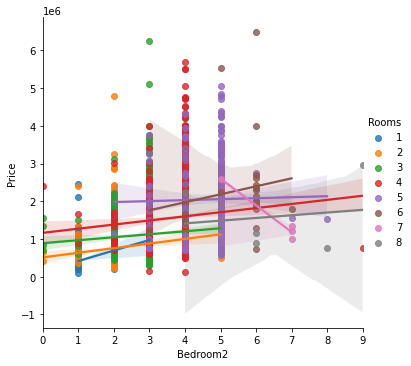

In [ ]:
sns.lmplot(x="Bedroom2",y="Price",data=Data,hue="Rooms")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

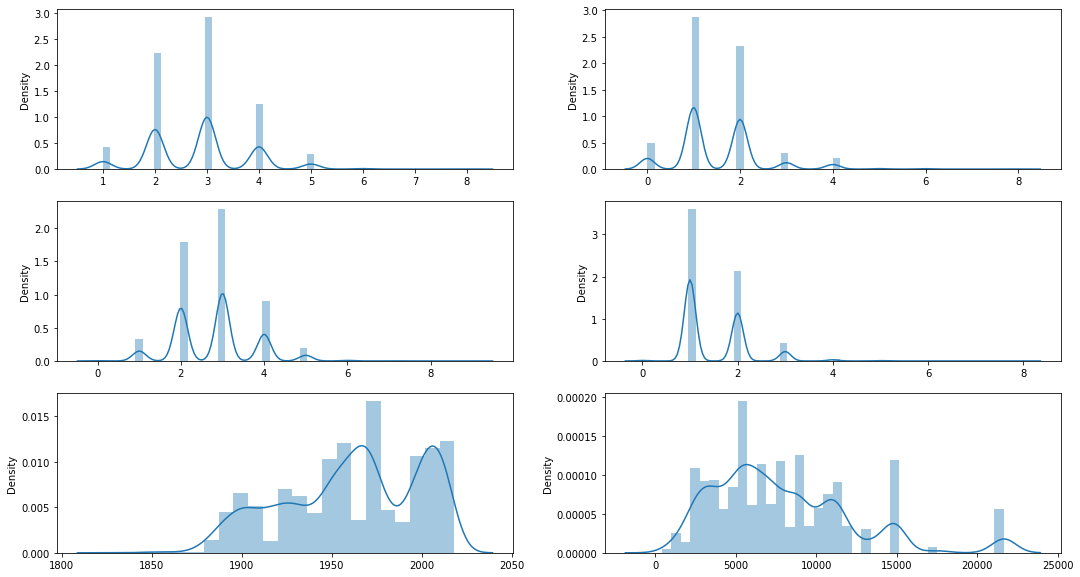

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,10))
 
sns.distplot(x=Data["Rooms"],kde=True, ax=ax1)
 
sns.distplot(x=Data["Car"],kde=True,ax=ax2)
 
sns.distplot(x=Data['Bedroom2'],kde=True,ax=ax3)
 
sns.distplot(x=Data['Bathroom'],kde=True, ax=ax4)
 
sns.distplot(x=Data['YearBuilt'],kde=True, ax=ax5)
 
sns.distplot(x=Data['Propertycount'], kde=True, ax=ax6)